# Image Recognition with Machine Learning (Part 1)

This is part 1 of my image recognition practice project using the original MNIST dataset, which contains 70,000 28x28 grayscale images of handwritten digits (0-9). MNIST stands for Modified National Institute of Standards and Technology. It was created by Yann Lecun, Corinna Cortes and christopher Burger, and has been preprocessed and cleaned to make it suitable for machine learning.

### Objectives:

- Image classification
- Comparing **Logistic Regression**, **Random Forest**, **K-Nearest Neighbors (KNN)**, and **Neural Networks**
- Understanding the Machine Learning workflow

## 1. Define the problem

**Goal:** build a model that can automatically recognize and classify handritten digits (0-9) from grayscale images.

**Why Machine Learning?** It allows the model learn from examples.

**Use case:** Handwriting recognition for document digitization, postal mail sorting, banking, and forms automation.

## What we will do step by step:
- Data loading and preprocessing: For simplicity and speed, normalize the data by dividing pixel values by 255, and flatten the images from 28x28 matrices into 784-length vectors.
- Train/Test Split: Split the dataset into training and testing sets. This allows us to train models on one part of the data and evaluate how well they perform on unseen data.
- Model Training & Evaluation --> **Logistic Regression**: A simple linear classifier. **K-Nearest Neighbors (KNN)**: Predicts a digit based on its closest neighbors. **Random Forest**: An ensemble of decision trees. **Neural Network**: A basic feedforward network built using Keras. Each model is evaluated on accuracy and confusion matrices.
- Confusion Matrices: Confusion matrices visualize how often digits are correctly and incorrectly classified. They help identify which digits are most confused by each model.
- Model Comparison: Compare the accuracy of all models using a bar chart. This shows which models performed best on this dataset.



##2. Gather & Prepare the data

**Understand the dataset:** 70,000 28x28 grayscale images of handwritten digits.
**Split the dataset:** 60,000 for training, 10,000 for testing.
**Preprocessing:**
- Normalize pixel values to range [0,1].
- Flatten images into vectors for logistic regresion, KNN, and Random Forest.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Let's see what the data actually looks like...

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

## 3 Model Deelopment
We'll train four models:
- Logistic Regression
- Random Forest
- K-Nearest Neighbors (KNN)
- Neural Networks (using Karas)

Each model is trained using the training data, and predictions are made on the test set.


In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

print(X_train_flat.shape)
print(X_test_flat.shape)

(60000, 784)
(10000, 784)


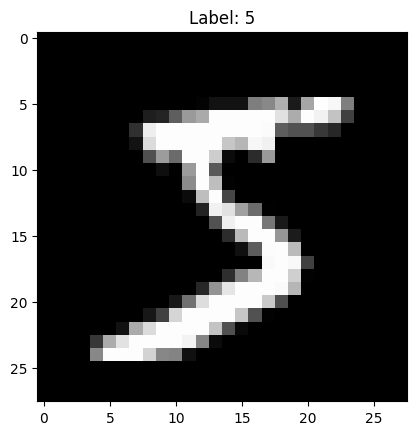

In [5]:
# e.g. visualize the first digit in the training set
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

### Model 1: Logistic Regression

First, let's build a classical machine learning model, in this case, logistic regression.

In [6]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_flat, y_train)

LogisticRegression(max_iter=1000)

In [7]:
y_pred_lr = lr_model.predict(X_test_flat)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.2f}")

Accuracy: 0.93


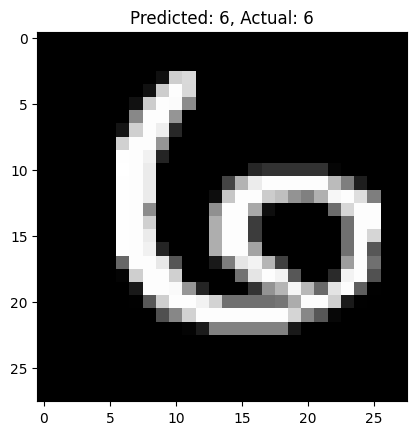

In [8]:
# visualize the actual and predicted value by index
index = 54
digit = X_test[index]
true_label = y_test[index]

pred_label = lr_model.predict([X_test_flat[index]])[0]

plt.imshow(digit, cmap='gray')
plt.title(f"Predicted: {pred_label}, Actual: {true_label}")
plt.show()

Plot a confusion matrix to see how well the logistic regression model is performing.

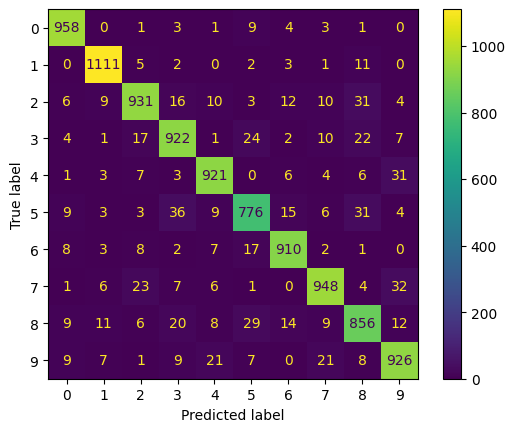

In [9]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()
plt.show()

### Model 2: K-Nearest Neighbors (KNN)

K-Nearest Neighbors is a non-parametric, instance-based learning algorithm. It makes predictions based on the majority class among the K closest training examples in the feature space.

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_flat, y_train)

y_pred_knn = knn_model.predict(X_test_flat)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn:.2f}")

Accuracy (KNN): 0.97


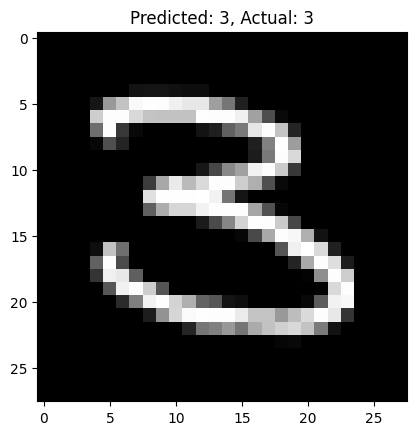

In [11]:
# visualize the actual and predicted value by index
index = 402
plt.imshow(X_test[index], cmap='gray')
plt.title(f"Predicted: {y_pred_knn[index]}, Actual: {y_test[index]}")
plt.show()

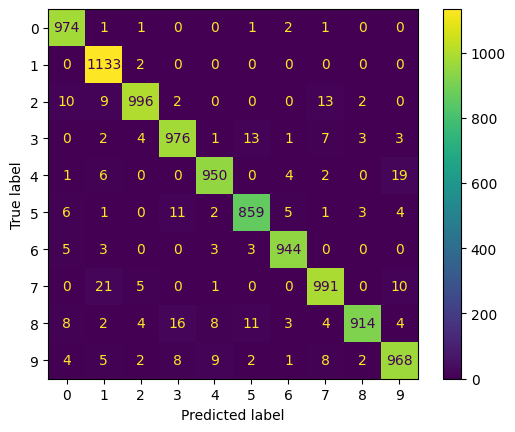

In [12]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.show()

### Model 3: Random Forest

Random Forest is an ensemble of decision trees that aggregates the results of multiple trees to make robust predictions. It’s great for high-dimensional data like MNIST.

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train)

y_pred_rf = rf_model.predict(X_test_flat)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf:.2f}")

Accuracy (Random Forest): 0.97


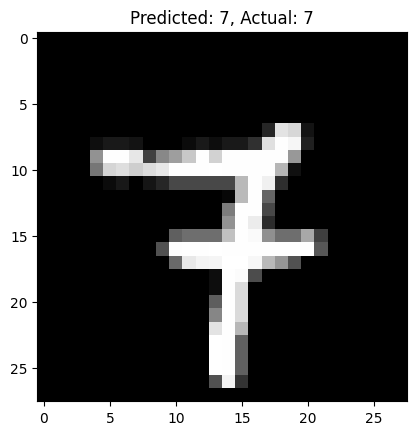

In [14]:
# visualize the actual and predicted value by index
index = 75
plt.imshow(X_test[index], cmap='gray')
plt.title(f"Predicted: {y_pred_rf[index]}, Actual: {y_test[index]}")
plt.show()

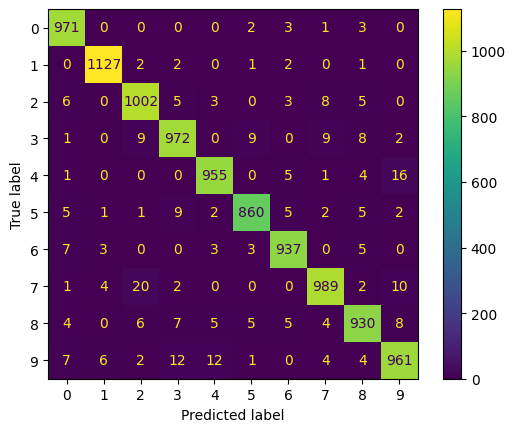

In [15]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.show()

### Model 4: Neural Network

Lastly, let's move on to building a simple Neural Network

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

nn_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
nn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [18]:
nn_model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8695 - loss: 0.4620 - val_accuracy: 0.9668 - val_loss: 0.1231
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9613 - loss: 0.1305 - val_accuracy: 0.9710 - val_loss: 0.0971
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9752 - loss: 0.0834 - val_accuracy: 0.9743 - val_loss: 0.0872
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9807 - loss: 0.0632 - val_accuracy: 0.9795 - val_loss: 0.0738
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9863 - loss: 0.0438 - val_accuracy: 0.9768 - val_loss: 0.0798


Evaluate the model nad make predictions

In [19]:
test_loss, accuracy_nn = nn_model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy_nn:.2f}")

# predict the digit
# pred_nn = nn_model.predict(np.array([X_test[0]]))
pred_nn = np.argmax(nn_model.predict(X_test), axis=-1)
print(f"Predicted: {np.argmax(pred_nn)}, Actual: {y_test[0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.0949
Test accuracy: 0.97
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted: 7, Actual: 7


Visualize the actual and the predicted

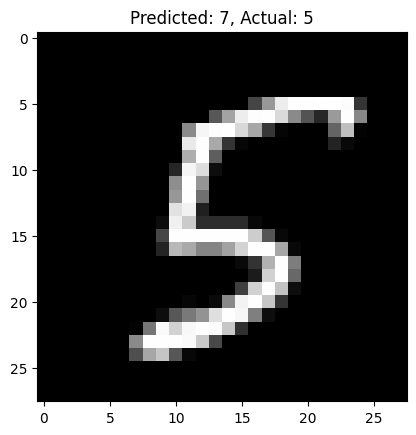

In [20]:
plt.imshow(X_test[23], cmap='gray')
plt.title(f"Predicted: {np.argmax(pred_nn)}, Actual: {y_test[23]}")
plt.show()

Plot a confusion matrix to see how well the simple neural network is performing.

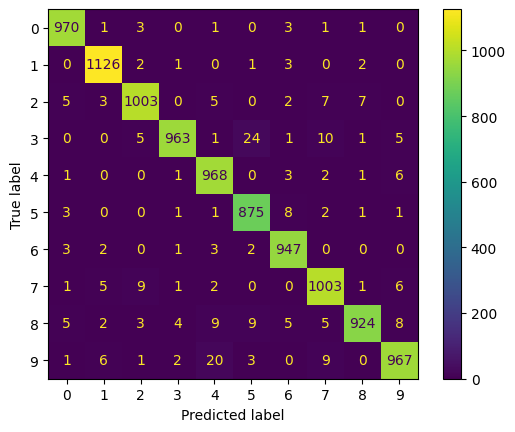

In [21]:
cm_nn = confusion_matrix(y_test, pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp.plot()
plt.show()

Finally, compare these four models

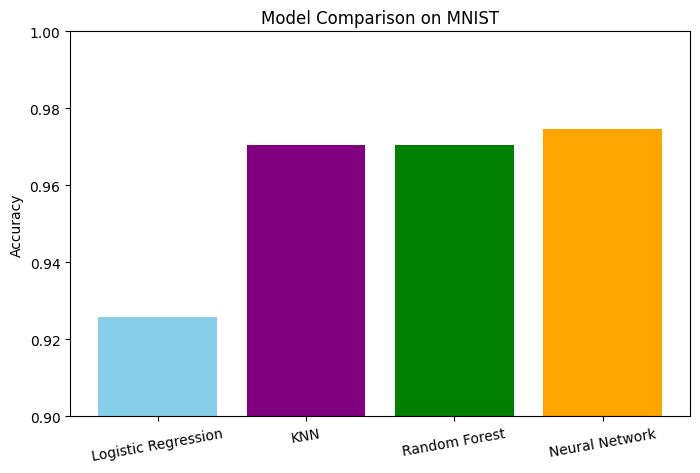

In [22]:
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Neural Network']
accuracies = [accuracy_lr, accuracy_knn, accuracy_rf, accuracy_nn]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'purple', 'green', 'orange'])
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.title("Model Comparison on MNIST")
plt.xticks(rotation=10)
plt.show()

##4. Evaluate the models

We'll evaluate performance using:
- Accuracy score: % of correct predictions
- Confusion matrix: Shows types of errors and which digits are confused
- Visual inspection: compare predicted vs actual labels on sample images.

## Conclusion

- All models performed well on the MNIST digit classification task, achieving over 90% accuracy.
- Logistic Regression is fast and interpretable, but it struggles with non-linear decision boundaries.
- KNN is intuitive but slower for large datasets.
- Random Forests provide a strong balance between interpretability and performance. they can handle non-linearities well and work out-of-the-box.
- Neural Networks outperform others but require more data and computation.


## 5. Model Deployment (Next steps)

While in this notebook we focuse on model development and evaluation, future work includes but not limit to:

- Implement Convolutional Neural Networks (CNNs) for better image feature extraction.
- Explore more challenging datasets like Fashion MNIST or EMNIST.
- Apply data augmentation and preprocessing techniques.
- Try model deployment using web apps or APIs.
